In [1]:
# Scientific
import random
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import expon

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ML
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Parallelization
from joblib import Parallel, delayed
from tqdm import tqdm

# Typing
from nptyping import NDArray, Float64, Shape

# Setting Notebook Options
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
seed = np.random.randint(0, 1e9)


In [2]:
from data_simulation.simulate_data import Experiment
exp1 = Experiment(max_cluster_number=6)
df = exp1.df
X = exp1.X
X.shape

(56, 2)

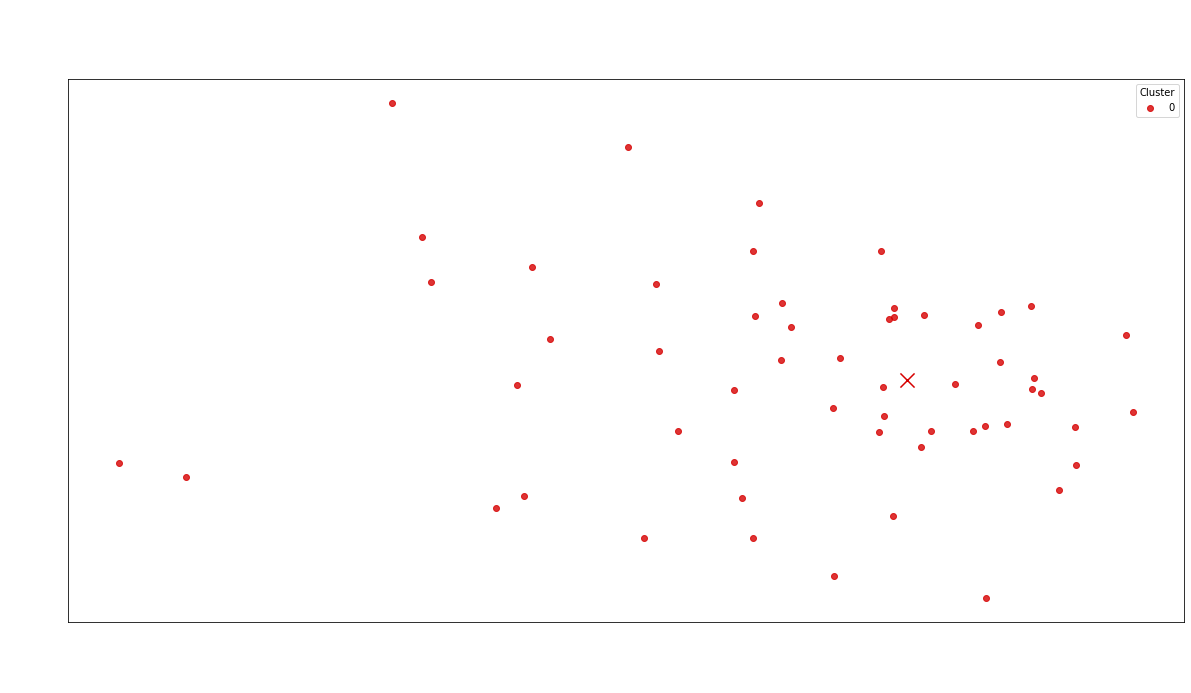

In [3]:
from plotting.plot_funcs import plot_cluster

plot_cluster(exp1.df, "cluster", title="True Clusters")

### Cluster initialization

In [4]:
from cluster_initialization.init_class import Cluster_initialization, Routine

cluster_init = Cluster_initialization(exp1.df, routine = Routine.random_inside)
params_array = cluster_init.init_params_array
init_params = cluster_init.init_params

In [5]:
from plotting.plot_funcs import plot_responsibilities
from IPython.display import display

if cluster_init.variant in ["OPTICS", "OPTICS_weighted"]:
    fig = plot_responsibilities(exp1, params_array)
    display(fig)
    fig = plot_cluster(cluster_init.df, "init_cluster", title="Cluster initizialization")
    display(fig)

Single Run

In [6]:
from model_selection.run import model_selection_run

em_params = {
    "max_iter": 100,
    "em_tol": 1e-6,
    "min_mix_coef": 0.00
}

init_params = {
    "N_cluster_max": 8,
    "N_runs_per_clusternumber": 10
}
parallel_params = {
    "n_jobs": 10
}

df_scores, results = model_selection_run(X, cluster_init, em_params, init_params, parallel_params)

100%|██████████| 80/80 [00:10<00:00,  7.71it/s]


In [7]:
df_scores

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,CH_scaled,CH_scaled2,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,CH_scaled_rank,CH_scaled2_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank
0,17,100,1.204312,-116.309950,124.309950,132.411357,124.254479,0.268208,15.974005,16.062630,19.889667,2,33,20,18,27,3,15,16,40,172,6,0.866400,1
1,14,88,0.590098,-115.852324,123.852324,131.953731,123.658176,0.283529,14.497306,14.585052,16.771853,2,26,11,11,19,1,21,21,48,158,2,0.861517,2
2,10,69,0.424402,-115.852490,123.852490,131.953897,123.658345,0.283529,14.497306,14.585052,16.771853,2,27,12,12,20,1,21,21,48,162,3,0.861516,3
3,15,73,0.471664,-115.852540,123.852540,131.953947,123.658409,0.283529,14.497306,14.585052,16.771853,2,28,13,13,21,1,21,21,48,166,4,0.861516,4
4,11,90,0.630520,-115.852672,123.852672,131.954078,123.658579,0.283529,14.497306,14.585052,16.771853,2,29,14,14,22,1,21,21,48,170,5,0.861514,5
5,13,100,0.703592,-115.852874,123.852874,131.954281,123.658793,0.283529,14.497306,14.585052,16.771853,2,30,15,15,23,1,21,21,48,174,7,0.861513,6
6,18,100,0.858224,-115.854006,123.854006,131.955413,123.660332,0.283529,14.497306,14.585052,16.771853,2,31,16,16,24,1,21,21,48,178,8,0.861503,7
7,16,100,0.897087,-115.857566,123.857566,131.958973,123.664645,0.283529,14.497306,14.585052,16.771853,2,32,17,17,25,1,21,21,48,182,10,0.861472,8
8,42,83,3.401965,-112.354581,132.354581,152.608098,125.103443,0.093086,16.929660,17.067466,32.579010,5,5,32,34,29,30,13,13,1,157,1,0.816240,9
9,43,85,3.316226,-113.188466,133.188466,153.441983,125.649859,0.200282,17.046735,17.209041,21.649277,5,8,33,36,32,11,12,12,36,180,9,0.803191,10


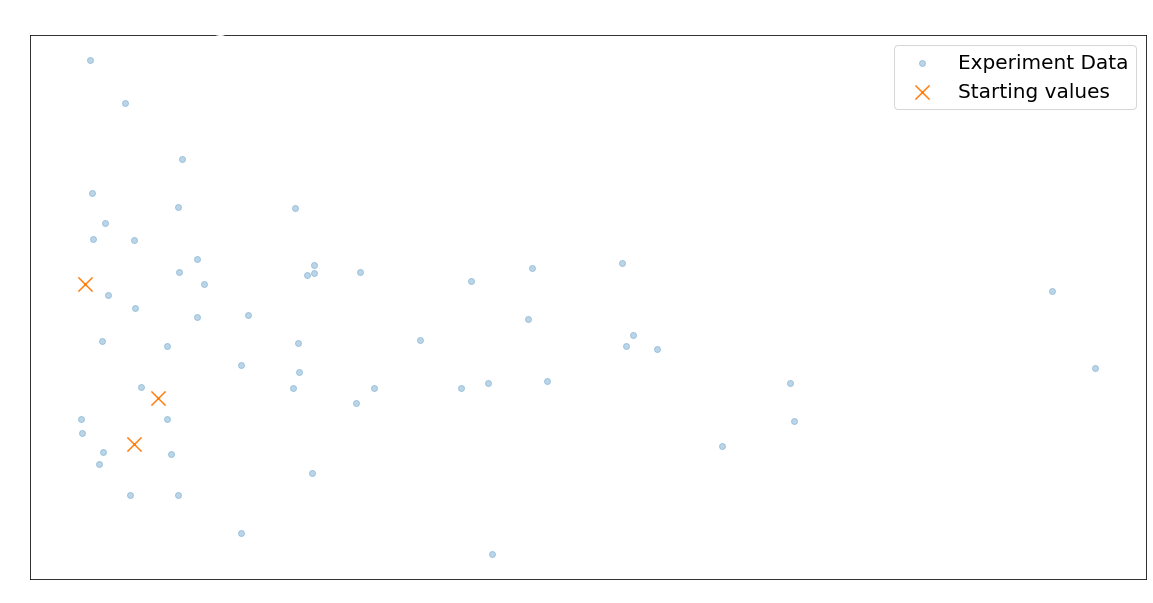

In [8]:
cluster_init.plot_initial_values(20)

In [9]:
df_scores.head(50)

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,CH_scaled,CH_scaled2,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,CH_scaled_rank,CH_scaled2_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank
0,17,100,1.204312,-116.309950,124.309950,132.411357,124.254479,0.268208,15.974005,16.062630,19.889667,2,33,20,18,27,3,15,16,40,172,6,0.866400,1
1,14,88,0.590098,-115.852324,123.852324,131.953731,123.658176,0.283529,14.497306,14.585052,16.771853,2,26,11,11,19,1,21,21,48,158,2,0.861517,2
2,10,69,0.424402,-115.852490,123.852490,131.953897,123.658345,0.283529,14.497306,14.585052,16.771853,2,27,12,12,20,1,21,21,48,162,3,0.861516,3
3,15,73,0.471664,-115.852540,123.852540,131.953947,123.658409,0.283529,14.497306,14.585052,16.771853,2,28,13,13,21,1,21,21,48,166,4,0.861516,4
4,11,90,0.630520,-115.852672,123.852672,131.954078,123.658579,0.283529,14.497306,14.585052,16.771853,2,29,14,14,22,1,21,21,48,170,5,0.861514,5
5,13,100,0.703592,-115.852874,123.852874,131.954281,123.658793,0.283529,14.497306,14.585052,16.771853,2,30,15,15,23,1,21,21,48,174,7,0.861513,6
6,18,100,0.858224,-115.854006,123.854006,131.955413,123.660332,0.283529,14.497306,14.585052,16.771853,2,31,16,16,24,1,21,21,48,178,8,0.861503,7
7,16,100,0.897087,-115.857566,123.857566,131.958973,123.664645,0.283529,14.497306,14.585052,16.771853,2,32,17,17,25,1,21,21,48,182,10,0.861472,8
8,42,83,3.401965,-112.354581,132.354581,152.608098,125.103443,0.093086,16.929660,17.067466,32.579010,5,5,32,34,29,30,13,13,1,157,1,0.816240,9
9,43,85,3.316226,-113.188466,133.188466,153.441983,125.649859,0.200282,17.046735,17.209041,21.649277,5,8,33,36,32,11,12,12,36,180,9,0.803191,10


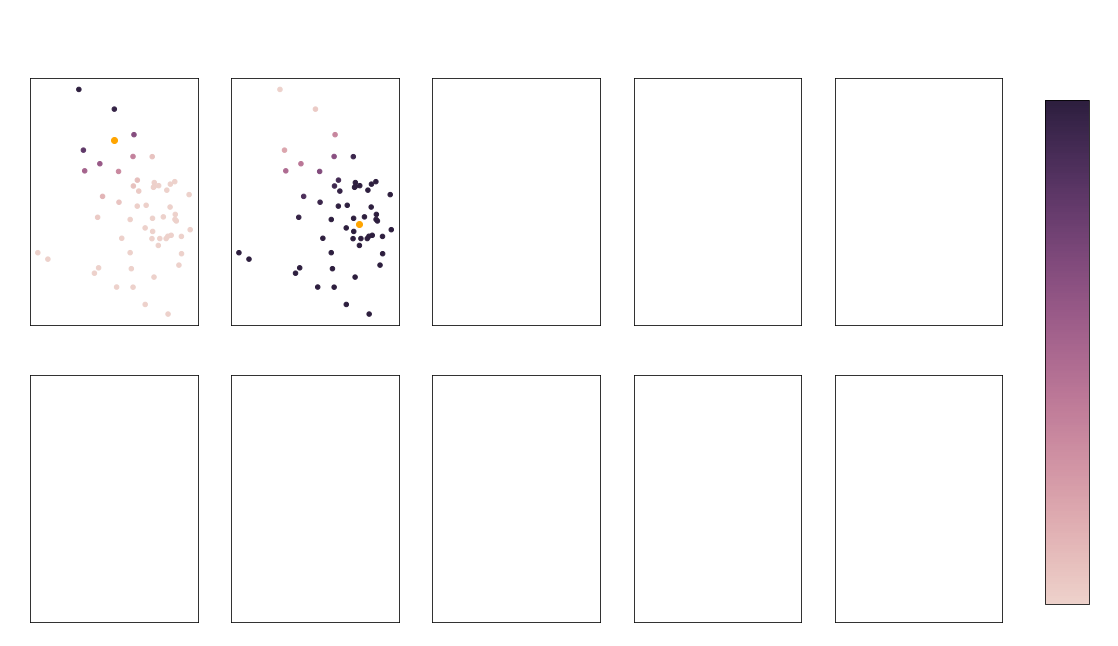

In [10]:
model_idx = 0

plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

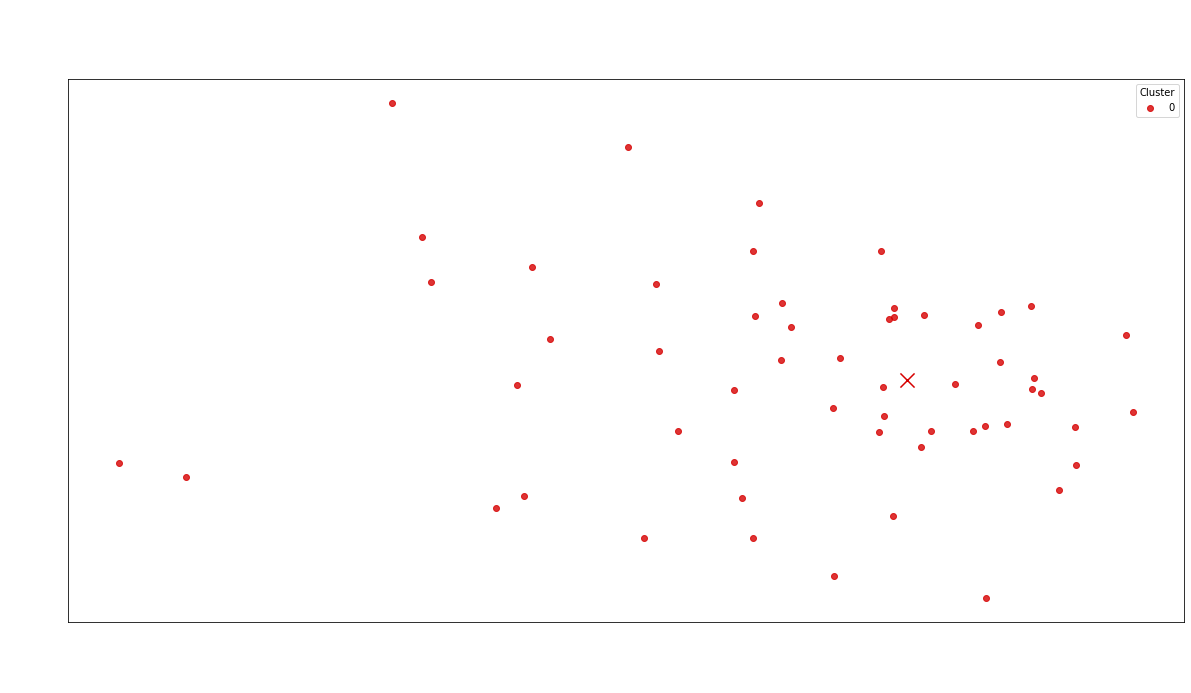

In [11]:
plot_cluster(exp1.df, "cluster", title="True Clusters")